<a href="https://colab.research.google.com/github/Raagalingampalli/EDA-assignment/blob/main/EDA_th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA theory assignment 21BDS0265

In [20]:
#RAAGA HARSHITA L
#21BDS0265

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv"
df = pd.read_csv(url, nrows=100)  # Load only first 100 rows to speed up processing

In [24]:
# Display basic info
print(df.head())
print(df.info())
print(df.describe())

   rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
0         1  124902   61.41   49.77       0      0       0      0      14.0   
1         2  124915   58.34   59.84       0      0       0      0      14.0   
2         3  124916   59.33   50.38       1      0       0      0      14.0   
3         4  124932   49.59   45.03       1      0       0      0      12.0   
4         5  124944   57.62   54.26       1      0       0      0      12.0   

   fatheduc   lfaminc  hsgrad  cathhs  parcath  
0      12.0  10.30895     1.0       0        1  
1      14.0  10.30895     1.0       0        1  
2      11.0  10.30895     1.0       0        1  
3      14.0  10.30895     1.0       0        1  
4      12.0  10.65726     1.0       0        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  100 non-null    int64  
 1   id   

In [25]:
# Data Cleaning
# Checking for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
rownames     0
id           0
read12       0
math12       0
female       0
asian        0
hispan       0
black        0
motheduc     0
fatheduc     0
lfaminc      0
hsgrad      18
cathhs       0
parcath      0
dtype: int64


In [26]:
# Handling missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

In [27]:
# Checking for duplicates
df.drop_duplicates(inplace=True)

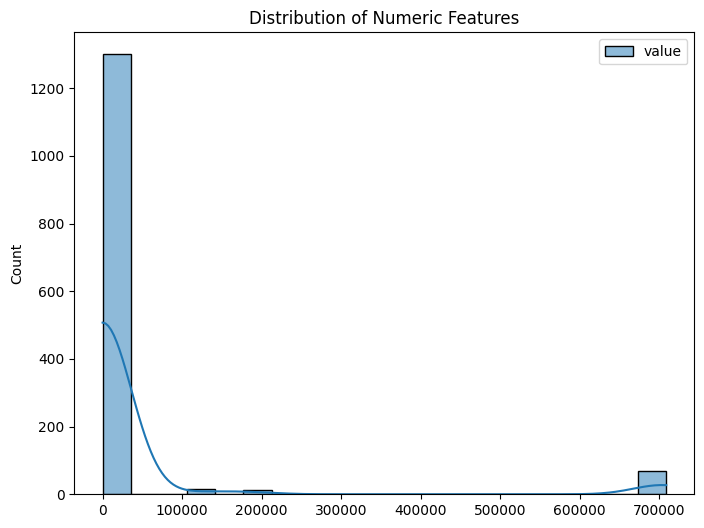

In [28]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df.select_dtypes(include=[np.number]).melt(), bins=20, kde=True)
plt.title("Distribution of Numeric Features")
plt.show()

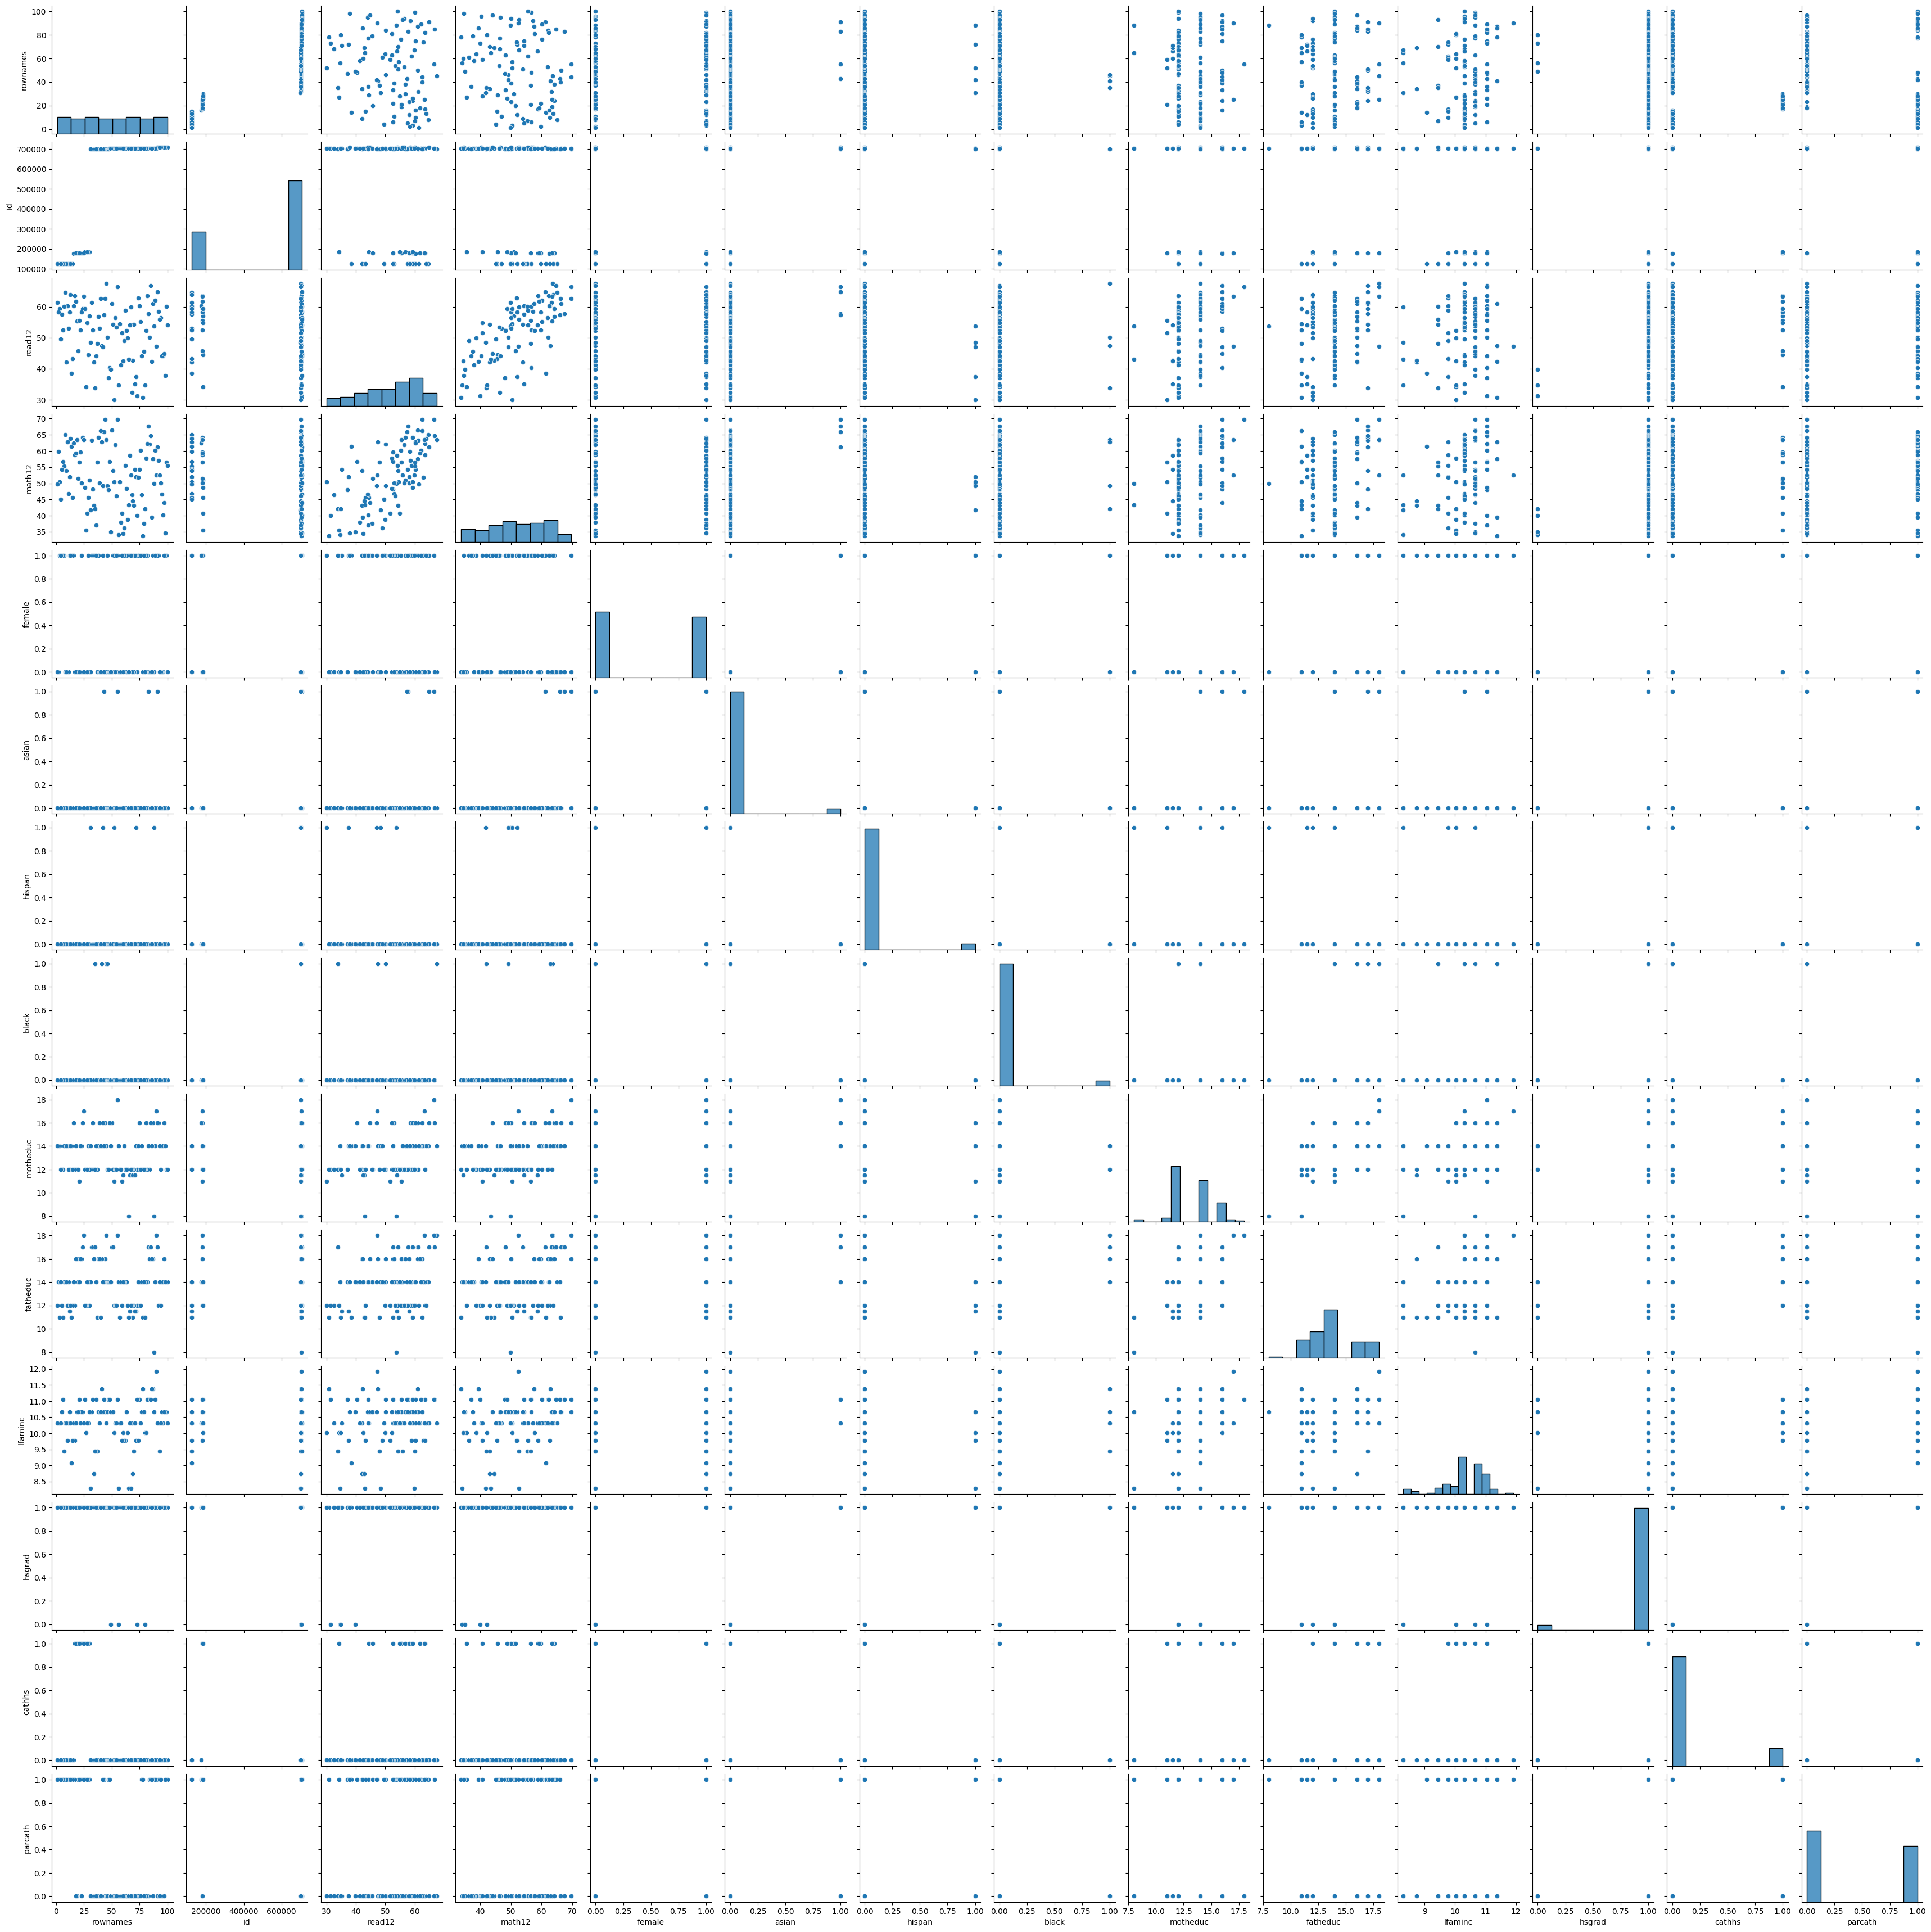

In [29]:
# Pairplot for numeric features
sample_size = min(len(df), 500)  # Use all rows if dataset is smaller
sns.pairplot(df.select_dtypes(include=[np.number]).sample(n=sample_size, replace=False))  # Sample only 500 rows to speed up
plt.show()

In [30]:
# Dimensionality Reduction using PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

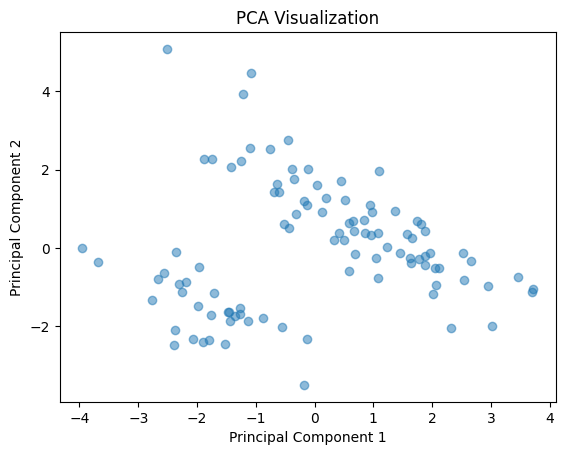

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [32]:
# Model Building (Random Forest as an example)
X = df.select_dtypes(include=[np.number])
y = np.random.choice([0, 1], size=len(df))  # Placeholder target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)

In [35]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22        10
           1       0.33      0.40      0.36        10

    accuracy                           0.30        20
   macro avg       0.29      0.30      0.29        20
weighted avg       0.29      0.30      0.29        20

Confusion Matrix:
 [[2 8]
 [6 4]]
